In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
ur1 = pd.read_csv("../Downloads/Alkanza/project_files/user_ratings_1.csv")
ur2 = pd.read_csv("../Downloads/Alkanza/project_files/user_ratings_2.csv")

In [3]:
ur2.columns = ur1.columns
ur = pd.concat([ur2, ur1], axis=0)
ur.reset_index(drop=True, inplace=True)

Text(0.5, 1.0, 'Average Value For Each Engagement, Past 3 Years')

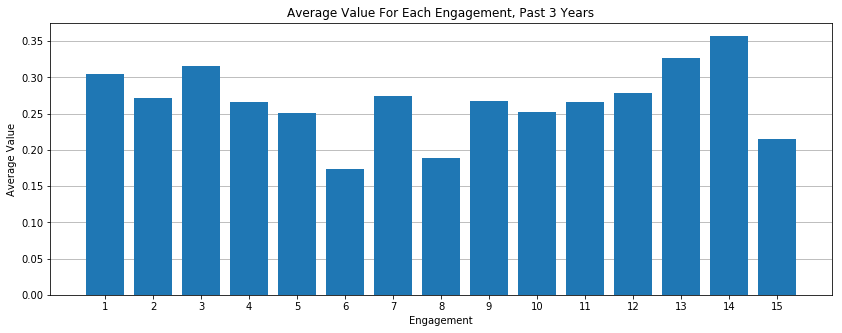

In [4]:
averages = ur.mean()[1:16]

fig, ax = plt.subplots(figsize=(14, 5))
ax.bar(np.arange(1,16), averages, zorder=3)
ax.set_xticks(np.arange(1,16))
ax.set_xlabel("Engagement")
ax.set_ylabel("Average Value")
ax.yaxis.grid(which="major", zorder=0)
ax.set_title("Average Value For Each Engagement, Past 3 Years")

In [5]:
def num_users(series):
    return np.sum(~series.isna())

Text(0.5, 1.0, 'Percent of Users That Have Received Each Engagement, Past 3 Years')

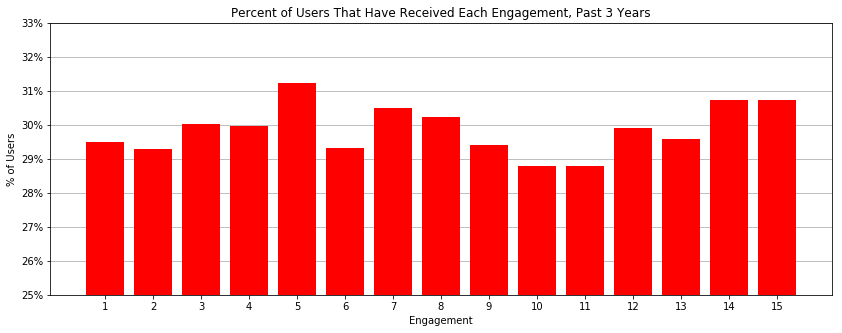

In [6]:
total_users = len(ur)
user_count = ur.apply(num_users)[1:16]
user_percent = user_count/total_users

fig, ax = plt.subplots(figsize=(14, 5))
ax.bar(np.arange(1,16), user_percent, color="red", zorder=3)
ax.set_xticks(np.arange(1,16))
ax.set_xlabel("Engagement")
ax.set_ylabel("% of Users")
ax.set_ylim(.25,.33)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.yaxis.grid(which="major", zorder=0)
ax.set_title("Percent of Users That Have Received Each Engagement, Past 3 Years")

## Question 3 Algorithm

The **rec** function implements the selection algorithm outlined in question 3:
* Count the number of engagements with ratings.
* If that number if greater than or equal to five, select the engagement with the highest rating.
* If not, then select a random engagement.

The function returns an integer ranging from 1 to 15 corresponding to the selected engagement.  Below, I show three example cases.  I display the ratings for the user and the selected engagement.

In [7]:
def rec(ratings):
    ratings = np.array(ratings)
    num_ratings = np.sum(~np.isnan(ratings))
    if num_ratings >= 5:
        return np.nanargmax(ratings)+1
    else:
        return np.random.choice(15)+1

In [8]:
user = 492
recommendation = rec(ur.iloc[user,1:16])
print(ur.iloc[user,1:16])
print("")
print("Recommend Engagement " + str(recommendation) + " for user " + str(user) + ".")

Engagement 1          NaN
Engagement 2    -1.279416
Engagement 3          NaN
Engagement 4    -0.390606
Engagement 5     1.410648
Engagement 6          NaN
Engagement 7          NaN
Engagement 8          NaN
Engagement 9          NaN
Engagement 10    2.269840
Engagement 11         NaN
Engagement 12         NaN
Engagement 13   -0.294824
Engagement 14         NaN
Engagement 15         NaN
Name: 492, dtype: float64

Recommend Engagement 10 for user 492.


In [9]:
user = 1001
recommendation = rec(ur.iloc[user,1:16])
print(ur.iloc[user,1:16])
print("")
print("Recommend Engagement " + str(recommendation) + " for user " + str(user) + ".")

Engagement 1          NaN
Engagement 2          NaN
Engagement 3    -0.441643
Engagement 4          NaN
Engagement 5          NaN
Engagement 6          NaN
Engagement 7          NaN
Engagement 8          NaN
Engagement 9    -0.813167
Engagement 10    0.066994
Engagement 11         NaN
Engagement 12         NaN
Engagement 13         NaN
Engagement 14         NaN
Engagement 15         NaN
Name: 1001, dtype: float64

Recommend Engagement 3 for user 1001.


In [10]:
user = 3886
recommendation = rec(ur.iloc[user,1:16])
print(ur.iloc[user,1:16])
print("")
print("Recommend Engagement " + str(recommendation) + " for user " + str(user) + ".")

Engagement 1          NaN
Engagement 2          NaN
Engagement 3          NaN
Engagement 4          NaN
Engagement 5    -0.073806
Engagement 6          NaN
Engagement 7          NaN
Engagement 8          NaN
Engagement 9          NaN
Engagement 10    0.194903
Engagement 11         NaN
Engagement 12         NaN
Engagement 13         NaN
Engagement 14         NaN
Engagement 15    1.214050
Name: 3886, dtype: float64

Recommend Engagement 2 for user 3886.


## Pros and Cons of This Algorithm

This algorithm is easy to understand and simple to implement.  For users that have experienced at least 1/3 of the engagements, the highest rated one will always be selected.  However, this method of selection has several weaknesses.  In the case where the number of ratings is at least five, it is possible that all the ratings are below average.  Ratings for different engagements are weakly correlated, therefore someone that rates some engagements poorly is not guaranteed to also rate other engagements poorly.  If a user has all low ratings, then we would necessarily want to select an engagement that wasn't experienced.

Selecting at random when the number of ratings is less than five is also not optimal.  Random selecting means we are not using any of the information given by the ratings.  If for example we had a user that only experienced one engagement, but rated it very highly, recommending that engagement would likely be better than selecting an unexperienced engagement.

In [11]:
corr_mat = np.zeros((15,15))
for i in range(1,16):
    for j in range(1,16):
        if i==j:
            continue
        col_i = ur.columns[i]
        col_j = ur.columns[j]
        eng_i = ~ur[col_i].isna().values.reshape(5000,1)
        eng_j = ~ur[col_j].isna().values.reshape(5000,1)
        comb = np.concatenate([eng_i,eng_j], axis=1)
        both = np.all(comb, axis=1)
        eng_i_both = ur[both][col_i].to_list()
        eng_j_both = ur[both][col_j].to_list()
        corr_mat[i-1,j-1] = pearsonr(eng_i_both, eng_j_both)[0]

pd.DataFrame(index=range(1,16), columns=range(1,16), data=corr_mat)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,0.000000,0.030045,0.121393,0.013587,0.031970,0.130360,0.102484,0.172211,0.093335,0.065994,0.097783,0.157133,0.089375,0.153383,0.140046
2,0.030045,0.000000,0.146093,0.078318,0.057798,0.080941,0.047554,0.025930,0.042797,0.113806,0.014519,0.027030,0.010552,0.080242,0.086449
3,0.121393,0.146093,0.000000,0.106674,0.074584,0.049726,0.116824,0.105040,0.137476,0.107587,0.122938,0.027764,0.094586,0.129877,0.126680
4,0.013587,0.078318,0.106674,0.000000,0.150707,0.011718,0.111316,0.165834,0.089267,0.032473,0.049299,0.128977,0.101604,0.091624,0.075440
5,0.031970,0.057798,0.074584,0.150707,0.000000,0.042431,0.034692,0.145476,0.083745,0.132943,0.140065,0.073447,0.064381,0.134642,0.054230
6,0.130360,0.080941,0.049726,0.011718,0.042431,0.000000,-0.004965,0.020466,-0.066849,0.041889,0.183367,0.139107,0.081642,0.069769,0.089920
7,0.102484,0.047554,0.116824,0.111316,0.034692,-0.004965,0.000000,0.089430,0.105601,0.114453,0.001897,0.087380,-0.016213,0.118221,0.110576
8,0.172211,0.025930,0.105040,0.165834,0.145476,0.020466,0.089430,0.000000,0.116438,0.040030,-0.001027,0.102777,0.085292,0.071126,0.097583
9,0.093335,0.042797,0.137476,0.089267,0.083745,-0.066849,0.105601,0.116438,0.000000,0.114838,0.080125,0.079705,0.035879,0.007804,0.088555
10,0.065994,0.113806,0.107587,0.032473,0.132943,0.041889,0.114453,0.040030,0.114838,0.000000,0.157519,0.056803,0.145911,0.072987,0.023735


In [12]:
w_mat = np.zeros((15,15))
b_mat = np.zeros((15,15))
for i in range(1,16):
    for j in range(1,16):
        if i==j:
            continue
        col_i = ur.columns[i]
        col_j = ur.columns[j]
        eng_i = ~ur[col_i].isna().values.reshape(5000,1)
        eng_j = ~ur[col_j].isna().values.reshape(5000,1)
        comb = np.concatenate([eng_i,eng_j], axis=1)
        both = np.all(comb, axis=1)
        eng_i_both = ur[both][col_i].values.reshape(-1, 1)
        eng_j_both = ur[both][col_j].values
        model = LinearRegression()
        model.fit(eng_i_both, eng_j_both)
        w_mat[i-1,j-1] = model.coef_[0]
        b_mat[i-1,j-1] = model.intercept_

## Alternative Algorithm

We need to do some calculations (see above) before implementing the actual algorithm.  For every pair of engagements:

* Find every user that rated both engagements.
* Fit a simple linear model using one engagement as the independent variable and the other as the dependent.
* Save the weight and bias terms.

Now, given a user's ratings and the saved weights and biases, we can arrive at a recommendation:

* Predict each unrated engagement:
 - For each known rating, use the appropriate linear model parameters to predict the unrated engagement.
 - Estimate the unrated engagement by averaging all the predictions.
* After step 1, all engagements now have a rating.  Select the engagement with the highest rating.

In [13]:
def rec_2(ratings, w_mat, b_mat):
    ratings = np.array(ratings)
    num_rat = len(ratings)
    full_ratings = np.zeros(num_rat)
    non_nan_idx = np.where(~np.isnan(ratings))[0]
    for i in range(num_rat):
        if ~np.isnan(ratings[i]):
            full_ratings[i] = ratings[i]
        else:
            cand = []
            for j in non_nan_idx:
                pred = w_mat[j,i]*ratings[j] + b_mat[j,i]
                cand.append(pred)
            full_ratings[i] = np.mean(cand)
    return (np.argmax(full_ratings)+1, full_ratings)

## Comparison to the First Algorithm

Observe that since engagement ratings are weakly correlated, the linear predictors often yield values close to the overall average for a given engagement.  This means that in practice, if a user has at least one rating that is above ~.5, this algorithm will always pick the highest rated engagement that was already experienced.  In contrast, if the highest user rated engagement is scored below ~.3, then it is likely that a previously unexperienced engagement will be selected.  This means that in contrast to the first algorithm, we will always select a highly rated engagement even when few engagements have been scored, and we will never select a low rated engagement even if many have been scored.

We are told that each rating is a historical average of all previous rating values, however we don't know how many values each rating was averaged over.  This would be useful information to have as we would be more confident in values that were averaged over many occurrences versus values coming from only one or a few experiences.

In [14]:
user = 492
recommendation, full_ratings = rec_2(ur.iloc[user,1:16], w_mat, b_mat)
print(pd.DataFrame(index=ur.columns[1:16], data={"orig":ur.iloc[user,1:16].to_list(),"full":full_ratings}))
print("")
print("Recommend Engagement " + str(recommendation) + " for user " + str(user) + ".")

                   orig      full
Engagement 1        NaN  0.323927
Engagement 2  -1.279416 -1.279416
Engagement 3        NaN  0.324392
Engagement 4  -0.390606 -0.390606
Engagement 5   1.410648  1.410648
Engagement 6        NaN  0.185471
Engagement 7        NaN  0.307581
Engagement 8        NaN  0.190924
Engagement 9        NaN  0.284104
Engagement 10  2.269840  2.269840
Engagement 11       NaN  0.313432
Engagement 12       NaN  0.290207
Engagement 13 -0.294824 -0.294824
Engagement 14       NaN  0.401309
Engagement 15       NaN  0.162987

Recommend Engagement 10 for user 492.


In [15]:
user = 1001
recommendation, full_ratings = rec_2(ur.iloc[user,1:16], w_mat, b_mat)
print(pd.DataFrame(index=ur.columns[1:16], data={"orig":ur.iloc[user,1:16].to_list(),"full":full_ratings}))
print("")
print("Recommend Engagement " + str(recommendation) + " for user " + str(user) + ".")

                   orig      full
Engagement 1        NaN  0.197860
Engagement 2        NaN  0.236433
Engagement 3  -0.441643 -0.441643
Engagement 4        NaN  0.211562
Engagement 5        NaN  0.204014
Engagement 6        NaN  0.171359
Engagement 7        NaN  0.186352
Engagement 8        NaN  0.134572
Engagement 9  -0.813167 -0.813167
Engagement 10  0.066994  0.066994
Engagement 11       NaN  0.175714
Engagement 12       NaN  0.272173
Engagement 13       NaN  0.291713
Engagement 14       NaN  0.319053
Engagement 15       NaN  0.094842

Recommend Engagement 14 for user 1001.


In [16]:
user = 3886
recommendation, full_ratings = rec_2(ur.iloc[user,1:16], w_mat, b_mat)
print(pd.DataFrame(index=ur.columns[1:16], data={"orig":ur.iloc[user,1:16].to_list(),"full":full_ratings}))
print("")
print("Recommend Engagement " + str(recommendation) + " for user " + str(user) + ".")

                   orig      full
Engagement 1        NaN  0.296579
Engagement 2        NaN  0.286278
Engagement 3        NaN  0.366854
Engagement 4        NaN  0.268688
Engagement 5  -0.073806 -0.073806
Engagement 6        NaN  0.194106
Engagement 7        NaN  0.305648
Engagement 8        NaN  0.186948
Engagement 9        NaN  0.286123
Engagement 10  0.194903  0.194903
Engagement 11       NaN  0.251752
Engagement 12       NaN  0.325838
Engagement 13       NaN  0.405833
Engagement 14       NaN  0.361610
Engagement 15  1.214050  1.214050

Recommend Engagement 15 for user 3886.
